In [271]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from math import isnan


# Create Feature Vectors for Cosine Similarity with AU3
All of these figures are rough estimates by US Census and ACS data.

In [272]:
final_df = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/educational_attainment_2012.csv").iloc[1:]
final_df = final_df[['NAME', 'S1501_C01_014E']]
final_df['S1501_C01_014E'] = final_df['S1501_C01_014E'].astype(float) 
final_df = final_df.rename(columns = {'S1501_C01_014E': 'High School Graduation Rate'})

employment = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/employment_2012.csv").iloc[1:]['S2301_C04_026E']
final_df['Unemployment Rate'] = employment.astype(float)

health_insurance = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/health_insurance_2012.csv").iloc[1:]
health_insurance = health_insurance[['S2701_C01_001E', 'S2701_C02_001E']].astype(int)
health_insurance = health_insurance['S2701_C02_001E'].div(health_insurance['S2701_C01_001E'])
final_df['Percent Uninsured for Health'] = health_insurance.astype(float)

median_income = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/median_income_2012.csv")

num_households = median_income['S1903_C01_001E'].iloc[1:].astype(int)

median_income = median_income['S1903_C02_001E'].iloc[1:]
final_df['Median Household Income'] = median_income.astype(int)

food_stamps = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/heatmap_data/food_stamps_2012.csv").iloc[1:]
food_stamps = food_stamps['S2201_C02_001E'].astype(int).div(num_households)
final_df['Percentage of Households on Food Stamps'] = food_stamps.astype(float)

final_df = final_df.sort_values(by = 'NAME')
final_df.NAME = final_df.NAME.map(lambda x: x.replace(' Metro Area', '').replace(' Micro Area', ''))
final_df


,NAME,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
15,"Aberdeen, WA",86.6,23.7,0.173578,42057,0.216212
16,"Abilene, TX",83.5,17.5,0.187588,43407,0.136550
17,"Adrian, MI",91.0,25.8,0.111519,48224,0.140139
18,"Aguadilla-Isabela-San Sebasti?n, PR",66.0,31.8,0.059501,15339,0.454933
19,"Akron, OH",90.6,21.9,0.111187,49731,0.149729
...,...,...,...,...,...,...
10,"York-Hanover, PA",87.5,17.0,0.091445,55648,0.090488
11,"Youngstown-Warren-Boardman, OH-PA",88.7,13.6,0.118995,40686,0.179525
12,"Yuba City, CA",80.2,24.0,0.158815,45646,0.136201
13,"Yuma, AZ",71.6,20.6,0.255714,39485,0.219310


In [273]:
au3 = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/AU3_results.csv")[:-1].rename(columns = {'CBSA_Codes': 'RegionName'})
au3['RegionName'].iloc[1:] = au3['RegionName'].iloc[1:].astype(int)
metro_data = pd.read_csv("/Users/camilledunning/Desktop/ds3-zillow/datasets/metro_data.csv")[['RegionName', 'MetroName']]
au3 = pd.merge(au3, metro_data, on = 'RegionName')
au3 = au3.drop_duplicates(subset=None, keep='first', inplace=False).drop(columns = ['Unnamed: 0', 'RegionName'])
au3 = au3.rename(columns = {'MetroName': 'NAME'})
au3

,AU3,NAME
0,0.795075,"Ada, OK"
261,6.300922,"Adrian, MI"
522,5.965741,"Akron, OH"
783,5.699291,"Albany, GA"
1044,5.281652,"Albany, OR"
...,...,...
166912,6.255158,"Youngstown, OH"
167173,6.139532,"Yuba City, CA"
167434,6.139876,"Yuma, AZ"
167695,4.602732,"Zanesville, OH"


In [274]:
final_df_au3 = au3.merge(final_df, on = 'NAME', how = 'right', suffixes = ('', '_y')).dropna()
col_list = list(final_df_au3)
col_list[0], col_list[1] = col_list[1], col_list[0]
final_df_au3 = final_df_au3.ix[:, col_list]
final_df_au3

,NAME,AU3,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
0,"Adrian, MI",6.300922,91.0,25.8,0.111519,48224,0.140139
1,"Akron, OH",5.965741,90.6,21.9,0.111187,49731,0.149729
2,"Albany, GA",5.699291,79.9,19.3,0.206726,34469,0.238583
3,"Albuquerque, NM",5.356778,88.0,13.4,0.153148,46725,0.156425
4,"Alexandria, LA",4.384656,84.6,8.9,0.164420,40896,0.214571
...,...,...,...,...,...,...,...
241,"Worcester, MA",5.764700,89.9,16.5,0.041914,62505,0.130972
242,"Yakima, WA",4.417720,70.7,12.8,0.231651,43942,0.248458
243,"Yuba City, CA",6.139532,80.2,24.0,0.158815,45646,0.136201
244,"Yuma, AZ",6.139876,71.6,20.6,0.255714,39485,0.219310


## Standardise, Create 'Good/Bad' Measure

In [275]:
def standardise(col):
    return (col - col.mean()) / col.std()

def reverse_measure(col):
    return 1 - col

for i in range(1, len(final_df_au3.columns)):
    final_df_au3[final_df_au3.columns[i]] = standardise(final_df_au3[final_df_au3.columns[i]])

# Higher statistics are 'worse'
reverse_measure_cols = ['Unemployment Rate', 'Percent Uninsured for Health', 'Percentage of Households on Food Stamps']

for reverse_measure_col in reverse_measure_cols:
    final_df_au3[reverse_measure_col] = reverse_measure(final_df_au3[reverse_measure_col])

final_df_au3


,NAME,AU3,High School Graduation Rate,Unemployment Rate,Percent Uninsured for Health,Median Household Income,Percentage of Households on Food Stamps
0,"Adrian, MI",0.616191,0.767725,-0.300841,1.642874,0.308188,1.204596
1,"Akron, OH",0.448293,0.695696,0.219366,1.649767,0.503481,1.026278
2,"Albany, GA",0.314824,-1.231083,0.566170,-0.331295,-1.474323,-0.625830
3,"Albuquerque, NM",0.143253,0.227507,1.353148,0.779683,0.113933,0.901787
4,"Alexandria, LA",-0.343700,-0.384741,1.953386,0.545948,-0.641448,-0.179367
...,...,...,...,...,...,...,...
241,"Worcester, MA",0.347588,0.569645,0.939651,3.086188,2.158864,1.375039
242,"Yakima, WA",-0.327137,-2.887754,1.433180,-0.848139,-0.246716,-0.809443
243,"Yuba City, CA",0.535348,-1.177062,-0.060745,0.662166,-0.025895,1.277821
244,"Yuma, AZ",0.535520,-2.725688,0.392768,-1.347098,-0.824299,-0.267481


## Transpose DataFrame for Feature Creation

In [276]:
f = final_df_au3.T
new_header = f.iloc[0]
f = f[1:]
f.columns = new_header
f

NAME,"Adrian, MI","Akron, OH","Albany, GA","Albuquerque, NM","Alexandria, LA","Altoona, PA","Amarillo, TX","Anchorage, AK","Ann Arbor, MI","Appleton, WI",...,"Williamsport, PA","Wilmington, NC","Wilson, NC","Winston-Salem, NC","Wooster, OH","Worcester, MA","Yakima, WA","Yuba City, CA","Yuma, AZ","Zanesville, OH"
AU3,0.616191,0.448293,0.314824,0.143253,-0.3437,-2.54005,-0.000955241,-0.0125245,0.581645,-0.509194,...,-0.890112,0.373983,0.204731,0.150608,0.468545,0.347588,-0.327137,0.535348,0.53552,-0.234462
High School Graduation Rate,0.767725,0.695696,-1.23108,0.227507,-0.384741,0.677689,-0.744887,1.05584,1.1999,1.05584,...,0.173485,0.443594,-1.46518,-0.384741,-0.00658803,0.569645,-2.88775,-1.17706,-2.72569,0.0114193
Unemployment Rate,-0.300841,0.219366,0.56617,1.35315,1.95339,0.432783,2.5803,0.646201,0.65954,2.00674,...,0.192688,0.219366,0.65954,0.792926,2.20682,0.939651,1.43318,-0.0607454,0.392768,0.56617
Percent Uninsured for Health,1.64287,1.64977,-0.331295,0.779683,0.545948,1.99344,-0.369484,0.154629,2.34806,2.84941,...,2.23175,0.597918,-0.0316164,0.456505,1.10666,3.08619,-0.848139,0.662166,-1.3471,1.09222
Median Household Income,0.308188,0.503481,-1.47432,0.113933,-0.641448,-0.594536,0.0762222,3.32375,1.35865,1.85575,...,-0.0176011,0.538211,-1.14374,-0.465464,0.272162,2.15886,-0.246716,-0.0258948,-0.824299,-0.85268
Percentage of Households on Food Stamps,1.2046,1.02628,-0.62583,0.901787,-0.179367,0.622524,1.58123,1.88149,1.58403,2.32446,...,1.50948,1.44585,0.310155,1.09767,1.60041,1.37504,-0.809443,1.27782,-0.267481,-0.534018


In [277]:
vector = {k: [np.repeat(f[k].iloc[0], 5)] for k in list(f.columns)}
non_au3_dict = {k: [f[k].iloc[1:6].values] for k in list(f.columns)}

for k in au3_dict.keys():
    vector[k] = np.append(au3_dict[k], non_au3_dict[k])[0:10]

vector



cott, AZ': array([0.4550318483450017, 0.4550318483450017, 0.4550318483450017,
        0.4550318483450017, 0.4550318483450017, 0.8067484662576684,
        0.8432671081677704, 0.5662423633403535, 0.3643897132010833,
        0.6439880952866428], dtype=object),
 'Pueblo, CO': array([0.43555172120556535, 0.43555172120556535, 0.43555172120556535,
        0.43555172120556535, 0.43555172120556535, 0.7392638036809817,
        0.3156732891832229, 0.6780625634714005, 0.300201384227217,
        0.49430697074985075], dtype=object),
 'Punta Gorda, FL': array([0.47061147296308964, 0.47061147296308964, 0.47061147296308964,
        0.47061147296308964, 0.47061147296308964, 0.7883435582822085, 0.0,
        0.5877995447654447, 0.39244461933751534, 0.7414136602562655],
       dtype=object),
 'Racine, WI': array([0.4455027283387302, 0.4455027283387302, 0.4455027283387302,
        0.4455027283387302, 0.4455027283387302, 0.763803680981595,
        0.554083885209713, 0.7111515544217053, 0.5465382745769773,
  

In [278]:
def cos_sim(metro):
    arr1 = vector[metro][:5]
    arr2 = vector[metro][5:]

    # Compute cosine similarity
    dot = np.dot(arr1, arr2)
    norma = np.linalg.norm(arr1)
    normb = np.linalg.norm(arr2)
    cos = dot / (norma * normb)

    return cos

for k in vector.keys():
    vector[k] = cos_sim(k)

### Should not be expecting any geographic correlation, since we are just evaluating how similar our AU3 score is to various standardised "good/bad statistics"

In [336]:
df = pd.DataFrame({'NAME': list(vector.keys()), 'CS': list(vector.values())})
df = df.dropna().reset_index()
df

,index,NAME,CS
0,0,"Adrian, MI",0.968470
1,1,"Akron, OH",0.979740
2,2,"Albany, GA",0.937639
3,3,"Albuquerque, NM",0.983763
4,4,"Alexandria, LA",0.951591
...,...,...,...
240,241,"Worcester, MA",0.988590
241,242,"Yakima, WA",0.921200
242,243,"Yuba City, CA",0.985571
243,244,"Yuma, AZ",0.950132


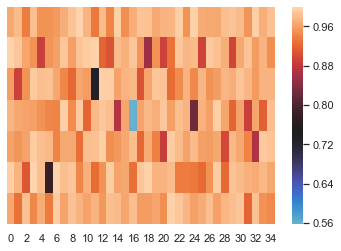

In [341]:
vals = df['CS'].values.reshape(7, 35)
sns.heatmap(vals, center = 0.75, yticklabels=False)